## Linear Regression Model 

In this use case, i have predicted the total assessed value for property in West Roxbury, using the given set of features (independent) variables, using Multiple Linear Regression OLS method.<br>
Dataset:**WestRoxbury.csv**.<br>
The dataset contains information about different value of the properties in West Roxbury.<br>
The value of the properties is available under the variable TOTAL_VALUE, which is the target variable, and all the other variables are the feature variables.<br> 

**Reference:**<br>
Shmueli, G. (2018). Data Minning for Busuiness analytics: Concepts,Techniques and application with.<br>

**Data Dictionary:**<br>

* LOT_SQFT: Total lot size of parcel in square feet<br>

* YR_BUILT: Year property was built<br>

* GROSS_AREA: Gross floor area<br>

* LIVING_AREA: Total living area for residential properties (ft2)<br>

* FLOORS: Number of floors<br>

* ROOMS: Total number of rooms<br>

* BEDROOMS: Total number of bedrooms<br>

* FULL_BATH: Total number of full baths<br>

* HALF_BATH: Total number of half baths<br>

* KITCHEN: Total number of kitchens<br>

* FIREPLACE: Total number of fireplaces<br>

* REMODEL_None: House was not remodeled (Yes = 1, No=0)<br>

* REMODEL_Recent: House was recently remodeled (Yes = 1, No=0)<br>

* TOTAL_VALUE: Total assessed value for property, in thousands of USD<br>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Import dataset with variables 
westroxbury_df = pd.read_csv('WestRoxbury.csv')

In [3]:
# View few rows of the dataframe
westroxbury_df.head()

,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_None,REMODEL_Recent,TOTAL_VALUE
0,9965,1880,2436,1352,2.0,6,3,1,1,1,0,1,0,344.2
1,6590,1945,3108,1976,2.0,10,4,2,1,1,0,0,1,412.6
2,7500,1890,2294,1371,2.0,8,4,1,1,1,0,1,0,330.1
3,13773,1957,5032,2608,1.0,9,5,1,1,1,1,1,0,498.6
4,5000,1910,2370,1438,2.0,7,3,2,0,1,0,1,0,331.5


In [4]:
# View shape of dataset
print(westroxbury_df.shape)

(5802, 14)


#### There are 5802 records and 14 variables in the dataframe

### Data Preparation

In [5]:
## Convert integer variables to relevant categorical variables
westroxbury_df['FLOORS'] = westroxbury_df['FLOORS'].astype('category')
westroxbury_df['ROOMS'] = westroxbury_df['ROOMS'].astype('category')
westroxbury_df['BEDROOMS'] = westroxbury_df['BEDROOMS'].astype('category')
westroxbury_df['FULL_BATH'] = westroxbury_df['FULL_BATH'].astype('category')
westroxbury_df['HALF_BATH'] = westroxbury_df['HALF_BATH'].astype('category')
westroxbury_df['KITCHEN'] = westroxbury_df['KITCHEN'].astype('category')
westroxbury_df['FIREPLACE'] = westroxbury_df['FIREPLACE'].astype('category')
westroxbury_df['REMODEL_None'] = westroxbury_df['REMODEL_None'].astype('category')
westroxbury_df['REMODEL_Recent'] = westroxbury_df['REMODEL_Recent'].astype('category')

In [6]:
# Creating a derived variable ‘building_age’ based on ‘YR_BUILT’ 
westroxbury_df['building_age'] = 2020 - westroxbury_df['YR_BUILT']
westroxbury_df['building_age'].describe()

count    5802.000000
mean       83.255084
std        35.989910
min         9.000000
25%        65.000000
50%        85.000000
75%       100.000000
max      2020.000000
Name: building_age, dtype: float64

In [7]:
# Deleting the ‘YR_BUILT’ variable
westroxbury_df.drop(['YR_BUILT'], axis=1, inplace=True)

## Univariate Analysis

In [8]:
# Summary of LOT_SQFT variable
westroxbury_df['LOT_SQFT'].describe()

count     5802.000000
mean      6278.083764
std       2669.707974
min        997.000000
25%       4772.000000
50%       5683.000000
75%       7022.250000
max      46411.000000
Name: LOT_SQFT, dtype: float64

In [9]:
# Summary of GROSS_AREA variable
westroxbury_df['GROSS_AREA'].describe()

count    5802.000000
mean     2924.842123
std       883.984726
min       821.000000
25%      2347.000000
50%      2700.000000
75%      3239.000000
max      8154.000000
Name: GROSS_AREA, dtype: float64

In [10]:
# Summary of building_age variable
westroxbury_df['building_age'].describe()

count    5802.000000
mean       83.255084
std        35.989910
min         9.000000
25%        65.000000
50%        85.000000
75%       100.000000
max      2020.000000
Name: building_age, dtype: float64

In [11]:
# Summary of LIVING_AREA variable
westroxbury_df['LIVING_AREA'].describe()

count    5802.000000
mean     1657.065322
std       540.456726
min       504.000000
25%      1308.000000
50%      1548.500000
75%      1873.750000
max      5289.000000
Name: LIVING_AREA, dtype: float64

In [12]:
# Summary of TOTAL_VALUE variable
westroxbury_df['TOTAL_VALUE'].describe()

count    5802.000000
mean      392.685715
std        99.177414
min       105.000000
25%       325.125000
50%       375.900000
75%       438.775000
max      1217.800000
Name: TOTAL_VALUE, dtype: float64

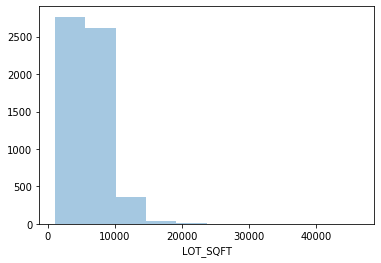

In [13]:
# Histogram for LOT_SQFT
sns.distplot(westroxbury_df['LOT_SQFT'],bins=10,kde=False);

#### Total lot size of parcel in square feet(LOT_SQFT) is mostly between 100 to 10,000

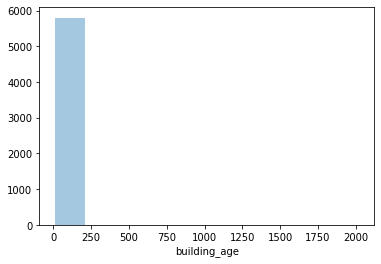

In [14]:
# Histogram for Building age
sns.distplot(westroxbury_df['building_age'],bins=10,kde=False);

#### Most buildings are between 50 and 120 years old

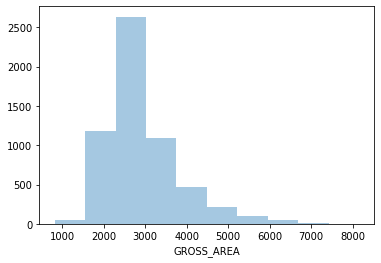

In [15]:
# Histogram for GROSS_AREA
sns.distplot(westroxbury_df['GROSS_AREA'],bins=10,kde=False);

#### Gross floor area(GROSS_AREA) is mosty between the range of 1500 to 3700

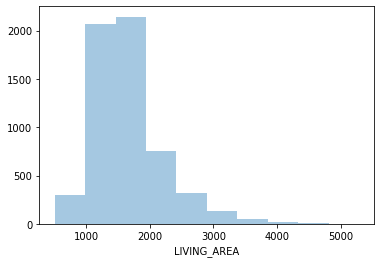

In [16]:
# Histogram for LIVING_AREA
sns.distplot(westroxbury_df['LIVING_AREA'],bins=10,kde=False);

#### Total living area for residential properties (ft2)(LIVING_AREA) is mostly between 1000ft2 to 2400ft2

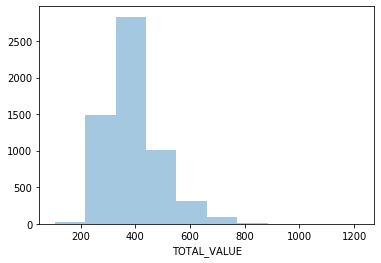

In [17]:
# Histogram for TOTAL_VALUE
sns.distplot(westroxbury_df['TOTAL_VALUE'],bins=10,kde=False);

#### The Total assessed value for property, in thousands of USD(TOTAL_VALUE) is mostly between 210 to 550

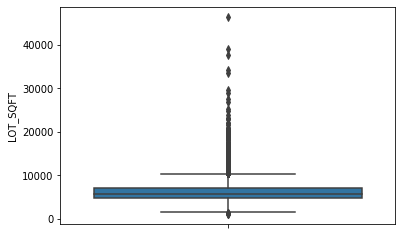

In [18]:
# Boxplot for LOT_SQFT
sns.boxplot(y = westroxbury_df['LOT_SQFT']);

#### The median of Total lot size of parcel in square feet(LOT_SQFT) is 6000

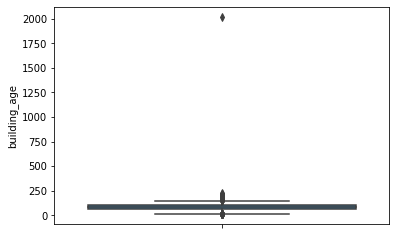

In [19]:
# Boxplot for Building Age
sns.boxplot(y = westroxbury_df['building_age']);

#### The median building age is around 85 years

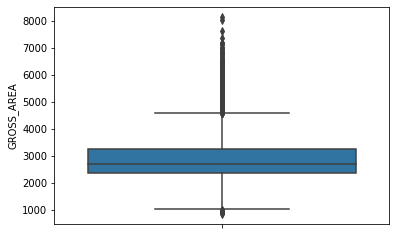

In [20]:
# Boxplot for GROSS_AREA
sns.boxplot(y = westroxbury_df['GROSS_AREA']);

#### The median of Gross floor area(GROSS_AREA) is 2700

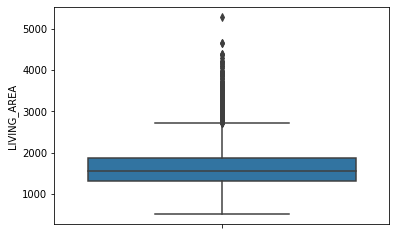

In [21]:
# Boxplot for LIVING_AREA
sns.boxplot(y = westroxbury_df['LIVING_AREA']);

#### The median of Total living area for residential properties (ft2)(LIVING_AREA) is 1500ft2

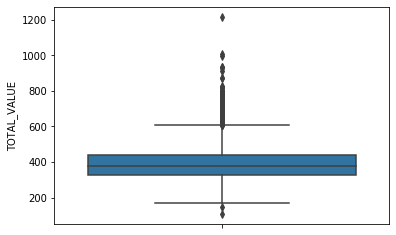

In [22]:
# Boxplot for TOTAL_VALUE
sns.boxplot(y = westroxbury_df['TOTAL_VALUE']);

#### The median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) is 380

In [23]:
# Count the values in REMODEL_None categorical variable
westroxbury_df['REMODEL_None'].value_counts()

1    4346
0    1456
Name: REMODEL_None, dtype: int64

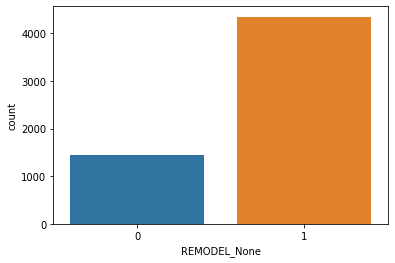

In [24]:
# Countplot for REMODEL_None variable
sns.countplot(westroxbury_df['REMODEL_None']);

#### The number of house was not remodeled(REMODEL_None) is higher than number of houses remodeled

In [25]:
# Count the values in REMODEL_Recent categorical variable
westroxbury_df['REMODEL_Recent'].value_counts()

0    4927
1     875
Name: REMODEL_Recent, dtype: int64

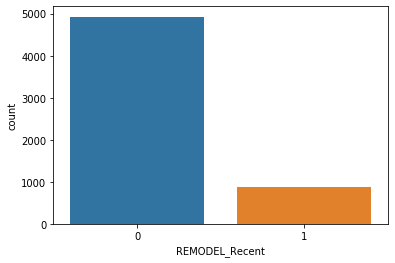

In [26]:
# Countplot for REMODEL_Recent variable
sns.countplot(westroxbury_df['REMODEL_Recent']);

#### The number of house was recently remodeled(REMODEL_Recent) is lesser than number of houses that were not recently remodeled.

In [27]:
# Count the values in KITCHEN categorical variable
westroxbury_df['KITCHEN'].value_counts()

1    5713
2      89
Name: KITCHEN, dtype: int64

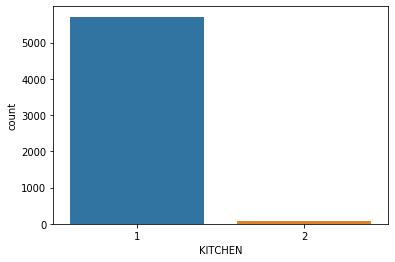

In [28]:
# Countplot for KITCHEN variable
sns.countplot(westroxbury_df['KITCHEN']);

#### The number of property with 1 Kitchens(KITCHEN) is higher than the number of property with 2 Kitchens(KITCHEN)

## Bivariate Analysis

#### LOT_SQFT vs TOTAL_VALUE

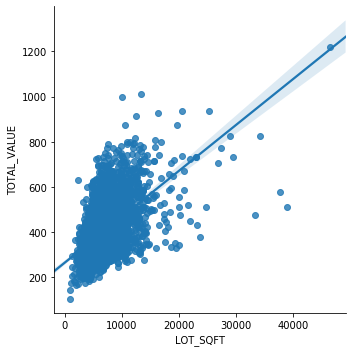

In [29]:
# lmplot of LOT_SQFT vs TOTAL_VALUE
sns.lmplot(x = 'LOT_SQFT',
           y = 'TOTAL_VALUE',
           data = westroxbury_df);

#### As the proportion of Total lot size of parcel in square feet(LOT_SQFT) increases, the Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### GROSS_AREA vs TOTAL_VALUE

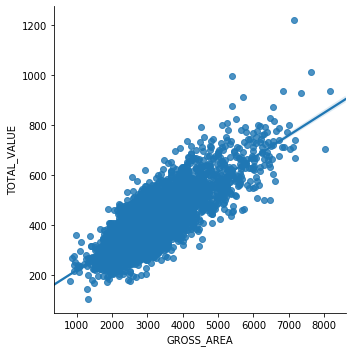

In [30]:
# lmplot of GROSS_AREA vs TOTAL_VALUE
sns.lmplot(x = 'GROSS_AREA',
           y = 'TOTAL_VALUE',
           data = westroxbury_df);

#### As the proportion of Gross floor area(GROSS_AREA) increases, the Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### LIVING_AREA vs TOTAL_VALUE

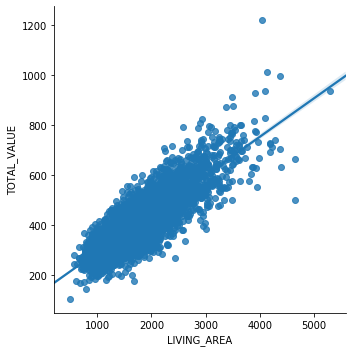

In [31]:
# lmplot of LIVING_AREA vs TOTAL_VALUE
sns.lmplot(x = 'LIVING_AREA',
           y = 'TOTAL_VALUE',
           data = westroxbury_df);

#### As the proportion of Total living area for residential properties (ft2)(LIVING_AREA) increases, the Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases¶

#### Building Age vs TOTAL_VALUE

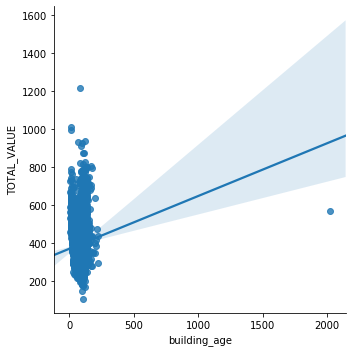

In [32]:
# lmplot of building age vs TOTAL_VALUE
sns.lmplot(x = 'building_age',
           y = 'TOTAL_VALUE',
           data = westroxbury_df);

#### There seems to be no relationship between building age and the total assessed value of the property

#### FLOORS vs TOTAL_VALUE

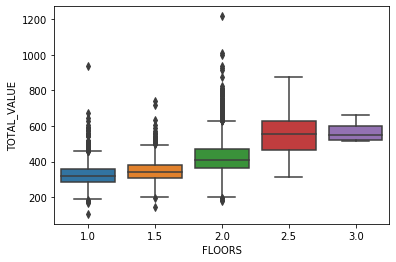

In [33]:
# Paired boxplot of FLOORS vs TOTAL_VALUE
sns.boxplot(x = 'FLOORS', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The Number of floors(FLOORS) Increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases and the median stops increasing after the 2.5 floors

#### ROOMS vs TOTAL_VALUE

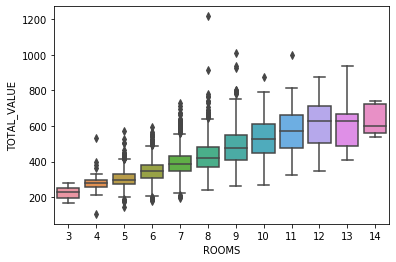

In [34]:
# Paired boxplot of ROOMS vs TOTAL_VALUE
sns.boxplot(x = 'ROOMS', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The Number of rooms(ROOMS) Increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases upto 12 rooms and there is slight decrease for the 13 and 14 rooms

#### BEDROOMS vs TOTAL_VALUE

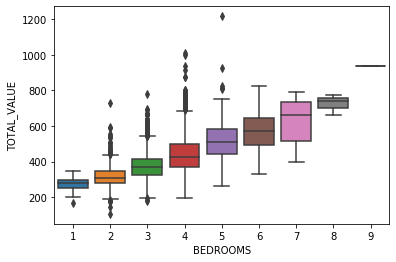

In [35]:
# Paired boxplot of BEDROOMS vs TOTAL_VALUE
sns.boxplot(x = 'BEDROOMS', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The Number of bedrooms(BEDROOMS) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### FULL_BATH vs TOTAL_VALUE

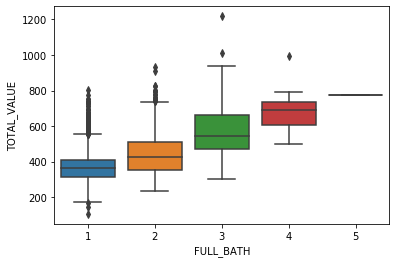

In [36]:
# Paired boxplot of FULL_BATH vs TOTAL_VALUE
sns.boxplot(x = 'FULL_BATH', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The Number of full bath(FULL_BATH) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### HALF_BATH vs TOTAL_VALUE

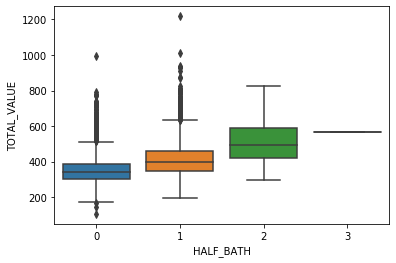

In [37]:
# Paired boxplot of HALF_BATH vs TOTAL_VALUE
sns.boxplot(x = 'HALF_BATH', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The Number of half bath(HALF_BATH) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) also increases

#### KITCHEN vs HOME_VALUE

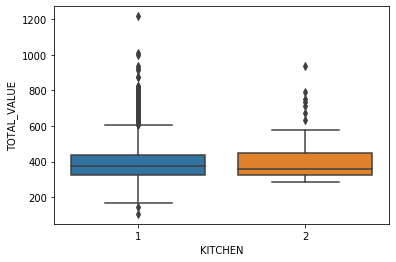

In [38]:
# Paired boxplot of KITCHEN vs TOTAL_VALUE
sns.boxplot(x = 'KITCHEN', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The Number of kitchens(KITCHENS) increases, the median of Total assessed value for property, in thousands of USD(TOTAL_VALUE) is almost the same there is no much difference

#### REMODEL_None vs TOTAL_VALUE

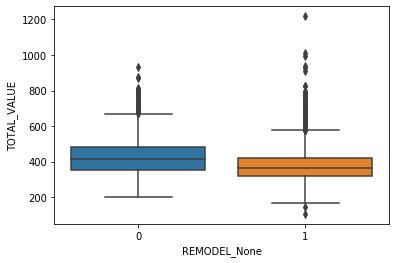

In [39]:
# Paired boxplot of REMODEL_None vs TOTAL_VALUE
sns.boxplot(x = 'REMODEL_None', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The median of houses was not remodeled (REMODEL_None) is slightly lesser the median of houses was remodeled 

#### REMODEL_Recent vs TOTAL_VALUE

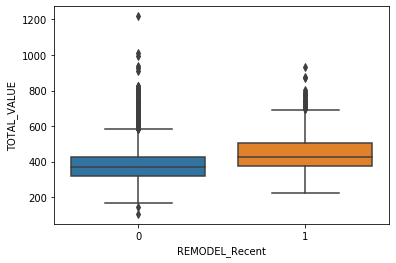

In [40]:
# Paired boxplot of REMODEL_Recent vs TOTAL_VALUE
sns.boxplot(x = 'REMODEL_Recent', 
            y = 'TOTAL_VALUE',
            data = westroxbury_df);

#### The median of houses was recently remodeled (REMODEL_Recent) is slightly higher the median of houses was not recently remodeled 

### c.	Print the correlation matrix for independent variables.

In [41]:
## Collect numerical variables in a dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_df = westroxbury_df.select_dtypes(include=numerics)

#Remove Y variable
numerical_df.drop('TOTAL_VALUE', axis=1, inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
# Check correlation among numerical independent variables using correlation matrix
cor = numerical_df.corr()
cor

,LOT_SQFT,GROSS_AREA,LIVING_AREA,building_age
LOT_SQFT,1.000000,0.448880,0.426045,0.068908
GROSS_AREA,0.448880,1.000000,0.899775,0.167928
LIVING_AREA,0.426045,0.899775,1.000000,0.131274
building_age,0.068908,0.167928,0.131274,1.000000


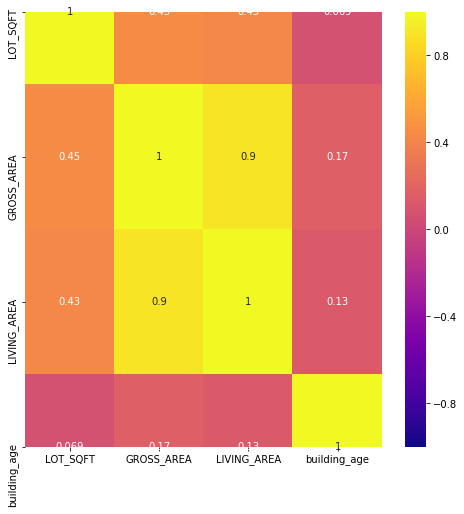

In [43]:
# View heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = 'plasma', annot = True);

In [44]:
#Highly correlated X variables
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:10]
so

LIVING_AREA   GROSS_AREA      0.899775
GROSS_AREA    LIVING_AREA     0.899775
              LOT_SQFT        0.448880
LOT_SQFT      GROSS_AREA      0.448880
LIVING_AREA   LOT_SQFT        0.426045
LOT_SQFT      LIVING_AREA     0.426045
building_age  GROSS_AREA      0.167928
GROSS_AREA    building_age    0.167928
building_age  LIVING_AREA     0.131274
LIVING_AREA   building_age    0.131274
dtype: float64

In [45]:
# Collect independent variables as X and dependent variable as Y
X  = westroxbury_df[['LOT_SQFT', 'building_age', 'GROSS_AREA', 'LIVING_AREA', 'FLOORS', 'ROOMS',
       'BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 'FIREPLACE',
       'REMODEL_None', 'REMODEL_Recent']]
y  = westroxbury_df['TOTAL_VALUE']

In [46]:
# Creating dummies for the categorical variables
X = pd.get_dummies(X,drop_first = True)

In [47]:
# Add an intercept to X for our model
X  = sm.add_constant(X)

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
# Create the linear regression model based on OLS method
valuemodel = sm.OLS(y, X).fit() ## OLS(output, input)

In [49]:
# View the model summary
valuemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL_VALUE   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     657.3
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:21:21   Log-Likelihood:                -29865.
No. Observations:                5802   AIC:                         5.981e+04
Df Residuals:                    5760   BIC:                         6.009e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               94.7820     24.436      3.879      0.000      46.879     142.685
LOT_SQFT             0.0086      0.000     36.638      0.000       0.008       0.009
building_age        -0.0554      0.017     -3.311      0.001      -0.088      -0.023
GROSS_AREA           0.0334      0.002     20.581      0.000       0.030       0.037
LIVING_AREA          0.0486      0.003     16.156      0.000       0.043       0.055
FLOORS_1.5          -2.7105      1.976     -1.371      0.170      -6.585       1.164
FLOORS_2.0          40.4676      1.750     23.123      0.000      37.037      43.898
FLOORS_2.5          44.2142      4.755      9.298      0.000      34.892      53.536
FLOORS_3.0          21.3836     22.278      0.960      0.337     -22.289      65.056
ROOMS_4             11.2982     24.920      0.453      0.650     -37.555      60.151
ROOMS_5              5.6252     24.799      0.227      0.821     -42.990      54.241
ROOMS_6             -0.7245     24.824     -0.029      0.977     -49.389      47.940
ROOMS_7              2.3804     24.849      0.096      0.924     -46.333      51.094
ROOMS_8              5.0294     24.886      0.202      0.840     -43.757      53.816
ROOMS_9              6.0028     24.975      0.240      0.810     -42.958      54.963
ROOMS_10             0.8774     25.127      0.035      0.972     -48.380      50.135
ROOMS_11            19.7256     25.536      0.772      0.440     -30.334      69.785
ROOMS_12            -6.9815     25.895     -0.270      0.787     -57.746      43.783
ROOMS_13            -3.8767     28.698     -0.135      0.893     -60.136      52.383
ROOMS_14            -3.3578     31.873     -0.105      0.916     -65.841      59.125
BEDROOMS_2          12.8158      8.320      1.540      0.124      -3.495      29.126
BEDROOMS_3          10.8029      8.417      1.284      0.199      -5.697      27.303
BEDROOMS_4          10.1206      8.539      1.185      0.236      -6.619      26.860
BEDROOMS_5           2.2736      8.997      0.253      0.800     -15.363      19.910
BEDROOMS_6          10.0324      9.865      1.017      0.309      -9.307      29.372
BEDROOMS_7          13.0231     14.457      0.901      0.368     -15.318      41.364
BEDROOMS_8         -16.1230     28.056     -0.575      0.566     -71.124      38.878
BEDROOMS_9          71.0378     45.540      1.560      0.119     -18.238     160.313
FULL_BATH_2         20.0956      1.528     13.151      0.000      17.100      23.091
FULL_BATH_3         54.6993      3.997     13.686      0.000      46.864      62.534
FULL_BATH_4        110.5810     12.107      9.133      0.000      86.846     134.316
FULL_BATH_5        131.0120     42.514      3.082      0.002      47.669     214.355
HALF_BATH_1         18.6293      1.307     14.249      0.000      16.066      21.192
HALF_BATH_2         40.

#### In the main table, p value of F-stat, 0.00, is well below our level of significance 0.05. So, the overall model is statistically significant and valid for estimating the population Y variable.
#### Adjusted R-Squared value of 82.4% indicates good explanatory power of the independent variables for changes in Y variable

In [50]:
# Display the co-efficients and p values for each independent variable
reg_coeff = pd.DataFrame(valuemodel.params, columns = ['coef'])
reg_coeff['pvalue'] = valuemodel.pvalues.round(3)

#Sort the data in descending order of coefficients to identify X variables with most positive and most negative impact on Y
reg_coeff.sort_values(by='coef', ascending=False, inplace=True)

#Display only significant X variables
reg_coeff[reg_coeff['pvalue']<=0.05]

,coef,pvalue
FULL_BATH_5,131.011983,0.002
FULL_BATH_4,110.580961,0.000
const,94.781957,0.000
FULL_BATH_3,54.699296,0.000
FLOORS_2.5,44.214189,0.000
HALF_BATH_2,40.944866,0.000
FLOORS_2.0,40.467564,0.000
FIREPLACE_3,31.054566,0.001
FIREPLACE_2,30.437116,0.000
FIREPLACE_1,22.626697,0.000


#### Based on the model output, the X variable that has the maximum positive impact on the price is the number of full_bath set to 5

In [51]:
#X variables that are not significant
reg_coeff[reg_coeff['pvalue']>0.05]

,coef,pvalue
BEDROOMS_9,71.037789,0.119
HALF_BATH_3,36.737776,0.383
FLOORS_3.0,21.383554,0.337
ROOMS_11,19.725552,0.440
FIREPLACE_4,13.757595,0.518
BEDROOMS_7,13.023144,0.368
BEDROOMS_2,12.815781,0.124
ROOMS_4,11.298218,0.650
BEDROOMS_3,10.802886,0.199
BEDROOMS_4,10.120570,0.236


In [52]:
# Predict dependent variable using the created model
predictions = valuemodel.predict(X)
predictions[1:10]

1    457.807584
2    364.566396
3    549.194207
4    349.392362
5    290.395487
6    401.965124
7    314.107413
8    348.959515
9    508.853503
dtype: float64

#### Predicted property value  for the first 10 records

In [53]:
# Create the linear regression model based using sklearn library
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [54]:
# The R-square of the model
lm.score(X,y)

0.8239060689336053

####  R-Squared value of 81% indicates good explanatory power of the independent variables for changes in Y variable

In [55]:
# Coefficients of the created model
lm.coef_

array([ 8.07351379e-12,  8.62994495e-03, -5.53550046e-02,  3.33543380e-02,
        4.86448027e-02, -2.71046895e+00,  4.04675645e+01,  4.42141894e+01,
        2.13835536e+01,  1.12982180e+01,  5.62520517e+00, -7.24483408e-01,
        2.38037224e+00,  5.02935145e+00,  6.00280613e+00,  8.77371893e-01,
        1.97255524e+01, -6.98148732e+00, -3.87667478e+00, -3.35780470e+00,
        1.28157814e+01,  1.08028856e+01,  1.01205704e+01,  2.27356569e+00,
        1.00324168e+01,  1.30231443e+01, -1.61229578e+01,  7.10377893e+01,
        2.00955874e+01,  5.46992961e+01,  1.10580961e+02,  1.31011983e+02,
        1.86293266e+01,  4.09448660e+01,  3.67377756e+01, -1.55803991e+01,
        2.26266969e+01,  3.04371164e+01,  3.10545657e+01,  1.37575950e+01,
       -5.19768634e+00,  2.03280815e+01])

In [56]:
# Intercept for the created model
lm.intercept_

94.78195676717343

#### The Y-intercept or constant value is 94.78

In [57]:
### Predict the dependent variable, value of the property, using the model

# Predict dependent variable using the created model
predictions = lm.predict(X)
print(predictions[0:5]) # First five housing prices

[384.02620511 457.80758357 364.56639576 549.19420659 349.39236176]


#### Predicted property value for the first 5 records

In [58]:
# Import the Sklearn Model Performance Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [59]:
# Calculate MAE value for model evaluation
mae = mean_absolute_error(y,predictions)
print(np.round(mae,3))

31.292


In [60]:
# Calculate RMSE
mse = mean_squared_error(y,predictions)
rmse = np.sqrt(mse)
print(np.round(mse,3))
print(np.round(rmse,3))

1731.789
41.615


In [61]:
# Calculate MAPE
actual  = y
abs_error = np.abs(actual - predictions)
mape = np.round(np.mean(abs_error/actual),4)*100
mape

8.129999999999999

#### MAE is 31.292, RMSE is 41.615. 
#### MAPE value of 8.12 indicates good prediction accuracy of the model